     Age Group                                           Sentence  Label
0  middle-aged  I'm looking forward to the next chapter in my ...      1
1        older  I recently graduated and I'm looking to start ...      2
2        older  I have extensive experience in my field and am...      0
3        older  I am passionate about learning new skills and ...      0
4        older  I've worked hard to build my skills and now I'...      0
                                               Sentence  Label  \
0     I'm looking forward to the next chapter in my ...      1   
1     I recently graduated and I'm looking to start ...      2   
2     I have extensive experience in my field and am...      0   
3     I am passionate about learning new skills and ...      0   
4     I've worked hard to build my skills and now I'...      0   
...                                                 ...    ...   
1295     I'm confident in my ability to adapt and excel      2   
1296      I look forward to being 

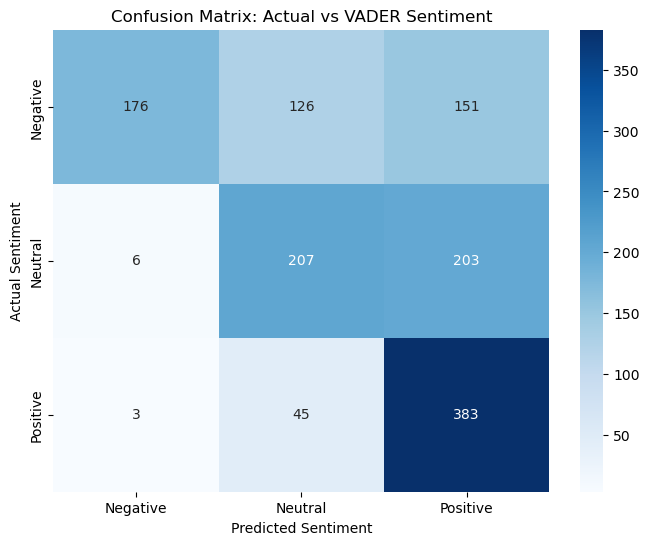

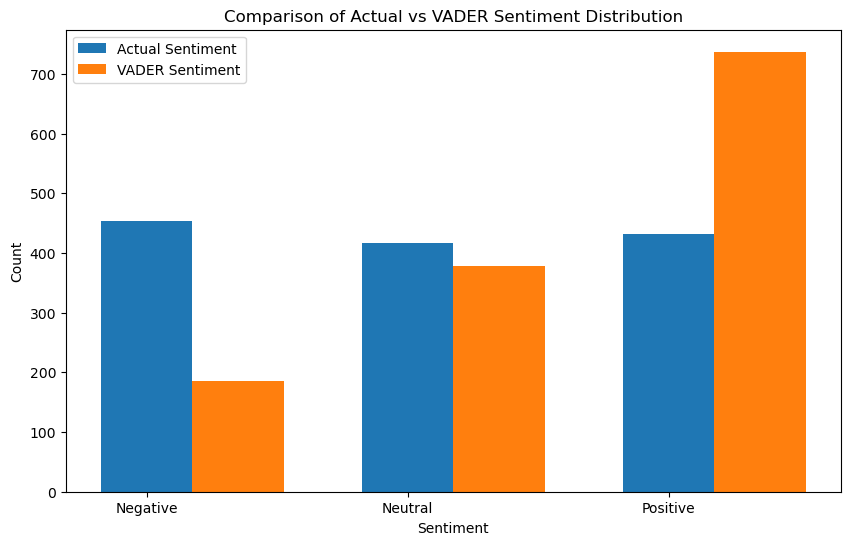

Percentage of Similarity: 58.92%
Sentences that are not similar:
Text: I'm looking forward to the next chapter in my career and excited about new opportunities, Actual: 1, VADER: 2
Text: I recently graduated and I'm looking to start my career, Actual: 2, VADER: 1
Text: I have extensive experience in my field and am looking for new opportunities, Actual: 0, VADER: 2
Text: I am passionate about learning new skills and taking on challenges, Actual: 0, VADER: 2
Text: I've worked hard to build my skills and now I'm ready to put them into action in a new role, Actual: 0, VADER: 2
Text: I am always eager to learn and grow, and I think this opportunity would help me do that, Actual: 1, VADER: 2
Text: I am excited to explore new challenges in my field and apply my expertise to make an impact, Actual: 0, VADER: 2
Text: I'm not sure where my skills fit in today's market, Actual: 0, VADER: 2
Text: I've struggled to find opportunities that match my experience, Actual: 0, VADER: 2
Text: It's been ch

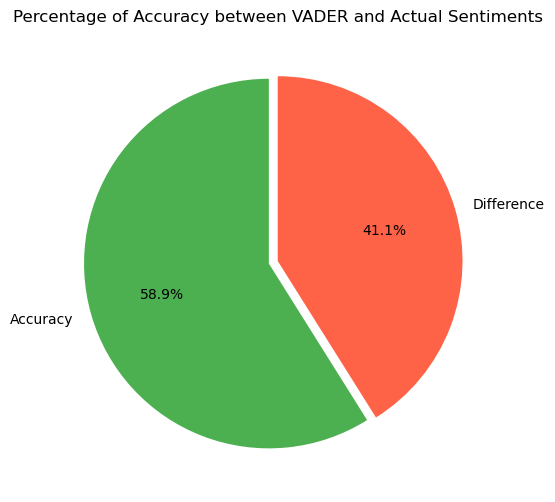

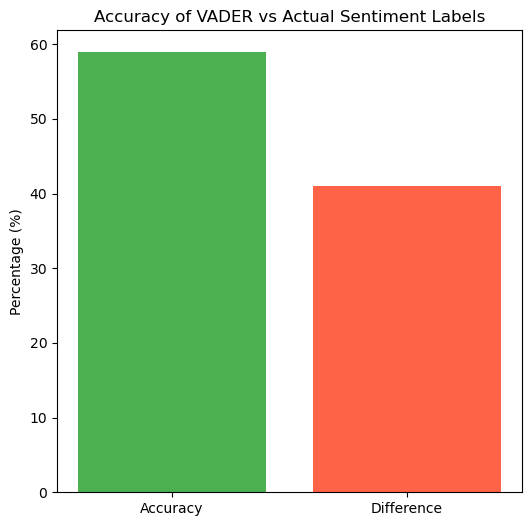

In [4]:
!pip install vaderSentiment pandas scikit-learn matplotlib seaborn

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load VADER sentiment analyzer
#vader = SentimentIntensityAnalyzer()
#new_words = {
 #  'ups and downs in the industry, but': 0.04,
    
    # Add more words as per your data
#}

# Update the VADER lexicon
#vader.lexicon.update(new_words)
#sentence = "I’ve been through ups and downs in the industry, but I’ve stayed committed to learning and evolving."
#score = vader.polarity_scores(sentence)

#print(score)

# Load CSV
df = pd.read_csv('FINAL - job_interview_SH7_responses_clean.csv')

# CSV has columns: 'sentence' for sentences and 'label' for labels (0, 1, 2)
print(df.head())  # Preview data

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
 
# Define a function to classify VADER output into 0, 1, 2
# By default, VADER classifies sentiment based on the compound score with thresholds
def classify_sentiment_vader(sentence):
    score = analyzer.polarity_scores(sentence)
    compound = score['compound']  # VADER returns a 'compound' score
    if compound <= -0.05:
        return 0  # Negative
    elif -0.05 < compound < 0.05:
        return 1  # Neutral
    else:
        return 2  # Positive

# Apply the function to each text in the dataframe
df['vader_sentiment'] = df['Sentence'].apply(classify_sentiment_vader)

print(df[['Sentence', 'Label', 'vader_sentiment']])  # Compare actual vs VADER results


# Calculate confusion matrix
cm = confusion_matrix(df['Label'], df['vader_sentiment'])

# Plot confusion matrix using seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix: Actual vs VADER Sentiment')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Count actual sentiments
actual_counts = df['Label'].value_counts().sort_index()

# Count VADER-predicted sentiments
vader_counts = df['vader_sentiment'].value_counts().sort_index()

# Bar plot comparison of actual vs VADER sentiments
plt.figure(figsize=(10,6))
bar_width = 0.35

# Plot actual sentiment distribution
plt.bar(actual_counts.index, actual_counts.values, bar_width, label='Actual Sentiment')

# Plot VADER sentiment distribution
plt.bar(vader_counts.index + bar_width, vader_counts.values, bar_width, label='VADER Sentiment')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Actual vs VADER Sentiment Distribution')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.legend()

# Show the plot
plt.show()

# Create a new column to check if VADER prediction matches the actual label
df['similarity'] = df['Label'] == df['vader_sentiment']

# Calculate percentage of similarity
similarity_percentage = df['similarity'].mean() * 100  # Mean of boolean True (1) and False (0)

print(f"Percentage of Similarity: {similarity_percentage:.2f}%")

# Filter and print the sentences where actual sentiment and VADER sentiment don't match
not_similar_sentences = df[df['similarity'] == False]

# Print the mismatched sentences
print("Sentences that are not similar:")
for index, row in not_similar_sentences.iterrows():
    print(f"Text: {row['Sentence']}, Actual: {row['Label']}, VADER: {row['vader_sentiment']}")

# Define similarity and difference percentages
similarity = df['similarity'].mean() * 100
difference = 100 - similarity

# Pie chart data
labels = ['Accuracy', 'Difference']
sizes = [similarity, difference]
colors = ['#4CAF50', '#FF6347']

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0))
plt.title('Percentage of Accuracy between VADER and Actual Sentiments')
plt.show()

# Bar chart to display similarity percentage
plt.figure(figsize=(6,6))
plt.bar(['Accuracy', 'Difference'], [similarity, difference], color=['#4CAF50', '#FF6347'])

# Add labels and title
plt.ylabel('Percentage (%)')
plt.title('Accuracy of VADER vs Actual Sentiment Labels')
plt.show()

In [2]:
from sklearn.metrics import classification_report

# Assuming the ground truth labels are in 'label' column
print(classification_report(df['Label'], df['vader_sentiment'], target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.39      0.55       453
     Neutral       0.55      0.50      0.52       416
    Positive       0.52      0.89      0.66       431

    accuracy                           0.59      1300
   macro avg       0.67      0.59      0.58      1300
weighted avg       0.68      0.59      0.58      1300

